In [1]:
from sympy import *

init_printing(use_unicode=True)


In [2]:
# STATE
x = Symbol('x')
y = Symbol('y')
theta = Symbol('θ')
l_ratio = Symbol('l_r')
d_ratio = Symbol('d_r')
h = Symbol('h')
l = l_ratio*h
d = d_ratio*h
# v, w 

# VIEW MATRIX
vr00 = Symbol('Vr_00')
vr01 = Symbol('Vr_01')
vr02 = Symbol('Vr_02')
vr10 = Symbol('Vr_10')
vr11 = Symbol('Vr_11')
vr12 = Symbol('Vr_12')
vr20 = Symbol('Vr_20')
vr21 = Symbol('Vr_21')
vr22 = Symbol('Vr_22')
VR = Matrix([[vr00, vr01, vr02],[vr10, vr11, vr12],[vr20, vr21, vr22]])
vtx = Symbol('Vtx')
vty = Symbol('Vty')
vtz = Symbol('Vtz')
VT = Matrix([vtx,vty,vtz])
viewMat = eye(4)
viewMat[0:3,0:3] = VR
viewMat[0:3,3] = VT

# PROJECTION MATRIX
fx = Symbol('f_x')
fy = Symbol('f_y')
cx = Symbol('c_x')
cy = Symbol('c_y')
P = Matrix([[fx,0,cx,0],[0,fy,cy,0],[0,0,1,0]])

# WORLD VIEW PROJECTION MATRIX
m00 = Symbol('m_00')
m01 = Symbol('m_01')
m02 = Symbol('m_02')
m03 = Symbol('m_03')
m10 = Symbol('m_10')
m11 = Symbol('m_11')
m12 = Symbol('m_12')
m13 = Symbol('m_13')
m20 = Symbol('m_20')
m21 = Symbol('m_21')
m22 = Symbol('m_22')
m23 = Symbol('m_23')
M_wvp = Matrix([[m00, m01, m02, m03],[m10, m11, m12, m13],[m20, m21, m22, m23]])

In [3]:
# ELLIPSOID
z = Symbol('z')

a = Symbol('a_3D')
b = Symbol('b_3D')
c = Symbol('c_3D')

subs_ellipsoid = {
    z : h/2,
    a : l/2,
    b : d/2,
    c : h/2
}

Q = Matrix([[a**2, 0, 0, 0], [0, b**2, 0, 0],[0, 0, c**2, 0],[0, 0, 0, -1]])

# WORLD Matrix
WR = Matrix([[cos(theta), -sin(theta), 0],[sin(theta), cos(theta), 0],[0,0,1]])
Re_w = eye(4)
Re_w[0:3,0:3] = WR.T

center_ellipsoid = Matrix([x,y,z])
T_c_inv = eye(4)
T_c_inv[0:3,3] = center_ellipsoid

W = T_c_inv*Re_w.T

# world view projection matrix
M_wvp_real = P*viewMat*W

subs_wvp = {
    m00 : M_wvp_real[0,0],
    m01 : M_wvp_real[0,1],
    m02 : M_wvp_real[0,2],
    m03 : M_wvp_real[0,3],
    m10 : M_wvp_real[1,0],
    m11 : M_wvp_real[1,1],
    m12 : M_wvp_real[1,2],
    m13 : M_wvp_real[1,3],
    m20 : M_wvp_real[2,0],
    m21 : M_wvp_real[2,1],
    m22 : M_wvp_real[2,2],
    m23 : M_wvp_real[2,3]
}


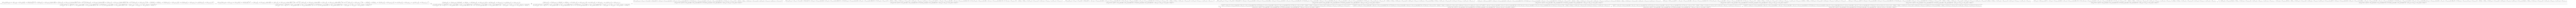

In [17]:

# ELLIPSE
C_star = M_wvp * Q * M_wvp.T
C_star = (-1/C_star[2,2])*C_star

ellipse_centre = Matrix([-C_star[0,2],-C_star[1,2]])

T_e_origin = eye(3)
T_e_origin[0:2, 2] = -ellipse_centre
C_centre = T_e_origin*C_star*T_e_origin.T
C_centre = (C_centre + C_centre.T)/2

C_submat = C_star[0:2, 0:2]

c1 = Symbol('c_00')
c2 = Symbol('c_01')
c3 = Symbol('c_10')
c4 = Symbol('c_11')
temp = Matrix([[c1,c2], [c3,c4]])
lambdas = temp.eigenvals()
lambdas_list = []
for l in lambdas:
    lambdas_list.append(l)
semi_axes = Matrix(lambdas_list)

subs_c = {
    c1: C_submat[0,0],
    c2: C_submat[0,1],
    c3: C_submat[1,0],
    c4: C_submat[1,1],
}

# Here we can obtain the final equations but they are too complex
# semi_axes.subs(subs_c).subs(subs_wvp).subs(subs_ellipsoid)
# With diff is possible to obtain the derivatives
diff(semi_axes.subs(subs_c).subs(subs_wvp).subs(subs_ellipsoid)[0], x)

In [34]:
for i in range(3):
    for j in range(4):
        print("m_{{{}{}}} &= ".format(i,j), M_wvp_real[i,j], "\\\\")

m_{00} &=  (Vr_00*f_x + Vr_20*c_x)*cos(θ) + (Vr_01*f_x + Vr_21*c_x)*sin(θ) \\
m_{01} &=  -(Vr_00*f_x + Vr_20*c_x)*sin(θ) + (Vr_01*f_x + Vr_21*c_x)*cos(θ) \\
m_{02} &=  Vr_02*f_x + Vr_22*c_x \\
m_{03} &=  Vtx*f_x + Vtz*c_x + x*(Vr_00*f_x + Vr_20*c_x) + y*(Vr_01*f_x + Vr_21*c_x) + z*(Vr_02*f_x + Vr_22*c_x) \\
m_{10} &=  (Vr_10*f_y + Vr_20*c_y)*cos(θ) + (Vr_11*f_y + Vr_21*c_y)*sin(θ) \\
m_{11} &=  -(Vr_10*f_y + Vr_20*c_y)*sin(θ) + (Vr_11*f_y + Vr_21*c_y)*cos(θ) \\
m_{12} &=  Vr_12*f_y + Vr_22*c_y \\
m_{13} &=  Vty*f_y + Vtz*c_y + x*(Vr_10*f_y + Vr_20*c_y) + y*(Vr_11*f_y + Vr_21*c_y) + z*(Vr_12*f_y + Vr_22*c_y) \\
m_{20} &=  Vr_20*cos(θ) + Vr_21*sin(θ) \\
m_{21} &=  -Vr_20*sin(θ) + Vr_21*cos(θ) \\
m_{22} &=  Vr_22 \\
m_{23} &=  Vr_20*x + Vr_21*y + Vr_22*z + Vtz \\
